# **Credit Risk Prediction**


In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Exploring the dataset

* In this dataset, each entry represents a person who takes a credit by a bank. 

* The target is: **loan_status** (0 or 1) 
  * 1 in case of default.
  * 0 otherwise.
* It is a **binary classification problem**. 

* The dataset is **highly imbalanced**.

* We would like to map the following features to the binary target. 
  * **person_age** (numerical) refers to the age.
  *   **person_income** (numerical) refers to the annual income.
  *   **person_home_ownership** (categorical: 'MORTGAGE', 'RENT', 'OWN', 'OTHER').
  *   **person_emp_length** (numerical) refers to the employment length (in years). 
  *   **loan_intent** (categorical: 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL') refers to the loan purpose.
  *   **loan_grade** (categorical: 'A', 'C', 'D', 'B', 'E', 'F','G').
  *   **loan_amnt** (numerical) refers to the loan amount.
  *   **loan_int_rate** (numerical) refers to the loan interest rate.
  *   **loan_percent_income** (numerical).
  *   **cb_person_default_on_file** (categorical: 'N', 'Y') refers to the historical default.
  *   **cb_person_cred_hist_length** (numerical) refers to the credit history length. 

## 1.1 Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn 

In [ ]:
# Specify the path to your working directory
import os
os.chdir("./gdrive/My Drive/Colab Notebooks/Machine Learning in Finance/")

In [ ]:
df = pd.read_csv("credit_dataset.csv", index_col=0)
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6
5,25,120000,MORTGAGE,2.0,PERSONAL,F,10000,20.99,0,0.08,N,4
6,22,43200,RENT,4.0,EDUCATION,C,3000,13.72,0,0.07,Y,3
7,33,45000,MORTGAGE,3.0,EDUCATION,D,8000,16.49,1,0.18,N,7
8,29,140000,MORTGAGE,13.0,VENTURE,A,12600,10.99,0,0.09,N,6
9,25,42000,RENT,2.0,MEDICAL,D,6750,17.27,1,0.16,N,2


Shuffle the rows of the dataset to randomise data since the data is not sequential.

In [ ]:
df = df.sample(frac=1.).reset_index(drop=True)# drop=TRUE drop the old index and only keeps the new one others it will create a new column of the index 

In [ ]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,33,35000,MORTGAGE,15.0,MEDICAL,C,12000,13.11,0,0.34,Y,7
1,24,45336,MORTGAGE,8.0,MEDICAL,A,10000,5.99,0,0.22,N,2
2,36,132000,RENT,3.0,HOMEIMPROVEMENT,A,10200,7.51,0,0.08,N,13
3,29,32400,RENT,5.0,VENTURE,A,10275,6.62,1,0.32,N,8
4,34,54600,RENT,2.0,MEDICAL,A,2500,7.88,0,0.05,N,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df['loan_grade'].unique() # identifies unique values of 'loan_grade'

array(['C', 'A', 'B', 'D', 'E', 'G', 'F'], dtype=object)

In [ ]:
#create quickaccess list with categorical variables labels
df.select_dtypes(exclude=['int64', 'float64'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,MORTGAGE,MEDICAL,C,Y
1,MORTGAGE,MEDICAL,A,N
2,RENT,HOMEIMPROVEMENT,A,N
3,RENT,VENTURE,A,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
32576,MORTGAGE,MEDICAL,B,N
32577,MORTGAGE,MEDICAL,B,N
32578,MORTGAGE,DEBTCONSOLIDATION,A,N
32579,RENT,MEDICAL,D,Y


In [ ]:
#create quickaccess list with numerical variables labels
df.select_dtypes(include=['int64', 'float64']) # Notice loan_Status is numerical but we treat this as categorical

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,33,35000,15.0,12000,13.11,0,0.34,7
1,24,45336,8.0,10000,5.99,0,0.22,2
2,36,132000,3.0,10200,7.51,0,0.08,13
3,29,32400,5.0,10275,6.62,1,0.32,8
4,34,54600,2.0,2500,7.88,0,0.05,8
...,...,...,...,...,...,...,...,...
32576,41,118075,5.0,28000,11.71,0,0.24,13
32577,21,56000,6.0,5600,10.37,0,0.10,4
32578,23,55000,7.0,4000,5.42,0,0.07,3
32579,28,39000,6.0,8000,14.91,1,0.21,7


Separating numerical and categorical variables

In [ ]:
numvars = list(df.select_dtypes(exclude=['object']).columns)
numvars.remove('loan_status')
catvars = list(df.select_dtypes(include=['object']).columns)

In [ ]:
print('the list of numerical variables', numvars)
print('the list of categorical variables', catvars)

the list of numerical variables ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
the list of categorical variables ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
df.loc[:10,:] # if you want to select certain columns
df[:10] # if you dont care about which columns, use .loc

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,33,35000,MORTGAGE,15.0,MEDICAL,C,12000,13.11,0,0.34,Y,7
1,24,45336,MORTGAGE,8.0,MEDICAL,A,10000,5.99,0,0.22,N,2
2,36,132000,RENT,3.0,HOMEIMPROVEMENT,A,10200,7.51,0,0.08,N,13
3,29,32400,RENT,5.0,VENTURE,A,10275,6.62,1,0.32,N,8
4,34,54600,RENT,2.0,MEDICAL,A,2500,7.88,0,0.05,N,8
5,26,180000,OWN,0.0,HOMEIMPROVEMENT,A,10000,8.00,0,0.06,N,4
6,27,120000,MORTGAGE,0.0,HOMEIMPROVEMENT,A,10000,6.62,0,0.08,N,10
7,23,85500,RENT,1.0,DEBTCONSOLIDATION,C,17000,13.11,0,0.20,Y,3
8,27,40000,RENT,4.0,DEBTCONSOLIDATION,B,4800,11.71,0,0.12,N,8
9,30,80000,MORTGAGE,0.0,HOMEIMPROVEMENT,A,11000,10.99,0,0.14,N,6


In [ ]:
# Threshold
th = int(0.7*len(df)) # index of split
# Splitting the dataset
df_train = df[:th]
df_test = df[th:]

In [ ]:
print('length of training data is ', len(df_train))
print('length of test data is ', len(df_test))

# We do not use the sklearn built in data split as we still have lots of data processing to do.

length of training data is  22806
length of test data is  9775


### 1.2 Adding a new categorical feature

---
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.

---

In [ ]:
# Loop way 
df_train['category_income'] = ''

# Create the new feature
for index , row in df_train.iterrows():
    person_income = row['person_income']
    if person_income < 39_000:
        category_income = 'D'
    elif person_income < 55_000:
        category_income = 'C'
    elif person_income < 79_000:
        category_income = 'B'
    else:
        category_income = 'A'
    
    # .at is like .loc
    df_train.at[index , 'category_income'] = category_income


<ipython-input-20-bf180b5814d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['category_income'] = ''


In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,33,35000,MORTGAGE,15.0,MEDICAL,C,12000,13.11,0,0.34,Y,7,D
1,24,45336,MORTGAGE,8.0,MEDICAL,A,10000,5.99,0,0.22,N,2,C
2,36,132000,RENT,3.0,HOMEIMPROVEMENT,A,10200,7.51,0,0.08,N,13,A
3,29,32400,RENT,5.0,VENTURE,A,10275,6.62,1,0.32,N,8,D
4,34,54600,RENT,2.0,MEDICAL,A,2500,7.88,0,0.05,N,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22801,27,103000,MORTGAGE,8.0,MEDICAL,A,8800,7.29,0,0.09,N,8,A
22802,49,72000,RENT,4.0,DEBTCONSOLIDATION,A,8000,7.49,0,0.11,N,17,B
22803,23,53000,RENT,0.0,VENTURE,C,9000,12.09,0,0.17,Y,3,C
22804,23,56000,RENT,3.0,EDUCATION,D,5875,14.54,0,0.10,N,2,B


Method 2:

In [ ]:
del df_train['category_income']

# Intervals
intervals = (-float('inf') , 39_000 , 55_000 , 79_000 , float('inf'))
# Labels 
labels = ['D' , 'C' , 'B' , 'A']

# pd.cut method
df_train['category_income'] = pd.cut(df_train.person_income  ,intervals ,labels = labels)
df_test['category_income'] = pd.cut(df_test.person_income ,  intervals , labels = labels)

In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,33,35000,MORTGAGE,15.0,MEDICAL,C,12000,13.11,0,0.34,Y,7,D
1,24,45336,MORTGAGE,8.0,MEDICAL,A,10000,5.99,0,0.22,N,2,C
2,36,132000,RENT,3.0,HOMEIMPROVEMENT,A,10200,7.51,0,0.08,N,13,A
3,29,32400,RENT,5.0,VENTURE,A,10275,6.62,1,0.32,N,8,D
4,34,54600,RENT,2.0,MEDICAL,A,2500,7.88,0,0.05,N,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22801,27,103000,MORTGAGE,8.0,MEDICAL,A,8800,7.29,0,0.09,N,8,A
22802,49,72000,RENT,4.0,DEBTCONSOLIDATION,A,8000,7.49,0,0.11,N,17,B
22803,23,53000,RENT,0.0,VENTURE,C,9000,12.09,0,0.17,Y,3,C
22804,23,56000,RENT,3.0,EDUCATION,D,5875,14.54,0,0.10,N,2,B


In [ ]:
catvars.append('category_income')

In [ ]:
df_train[catvars].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

# 2. Visualization

### 2.1 Count plot for a categorical variable. 

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.



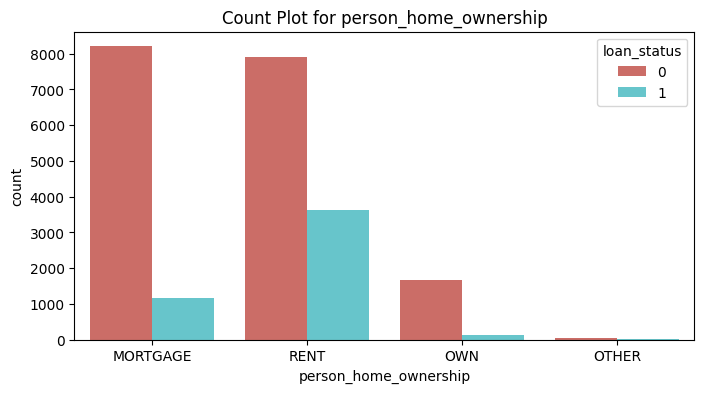

In [ ]:
fig = plt.figure(figsize=(8, 4))
g = sn.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
g.set_title("Count Plot for person_home_ownership")
plt.show()

### 2.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "0" and "1" targets. 

<ipython-input-27-e6692b53dc12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sn.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
<ipython-input-27-e6692b53dc12>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sn.distplot(df_train[df_train["loan_status"]==1]["person_income"], color="

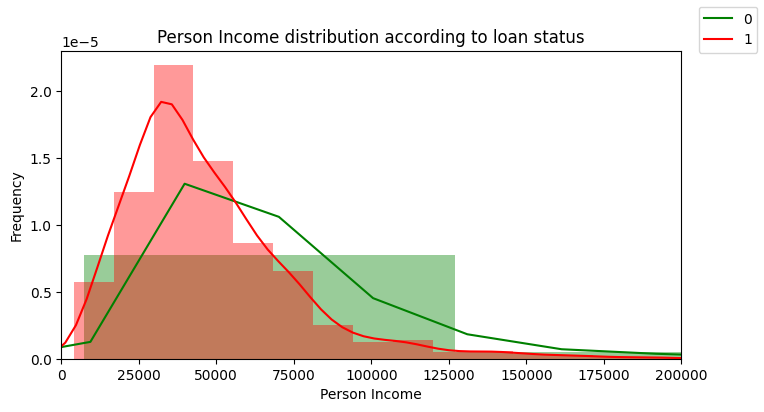

In [ ]:
fig = plt.figure(figsize=(8, 4))
g = sn.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
g = sn.distplot(df_train[df_train["loan_status"]==1]["person_income"], color="r")
g.set_xlabel("Person Income")
g.set(xlim=(0, 200000))
g.set_ylabel("Frequency")
g.set_title("Person Income distribution according to loan status")
fig.legend(labels=["0", "1"])
plt.show()

### 2.3 Boxplots 

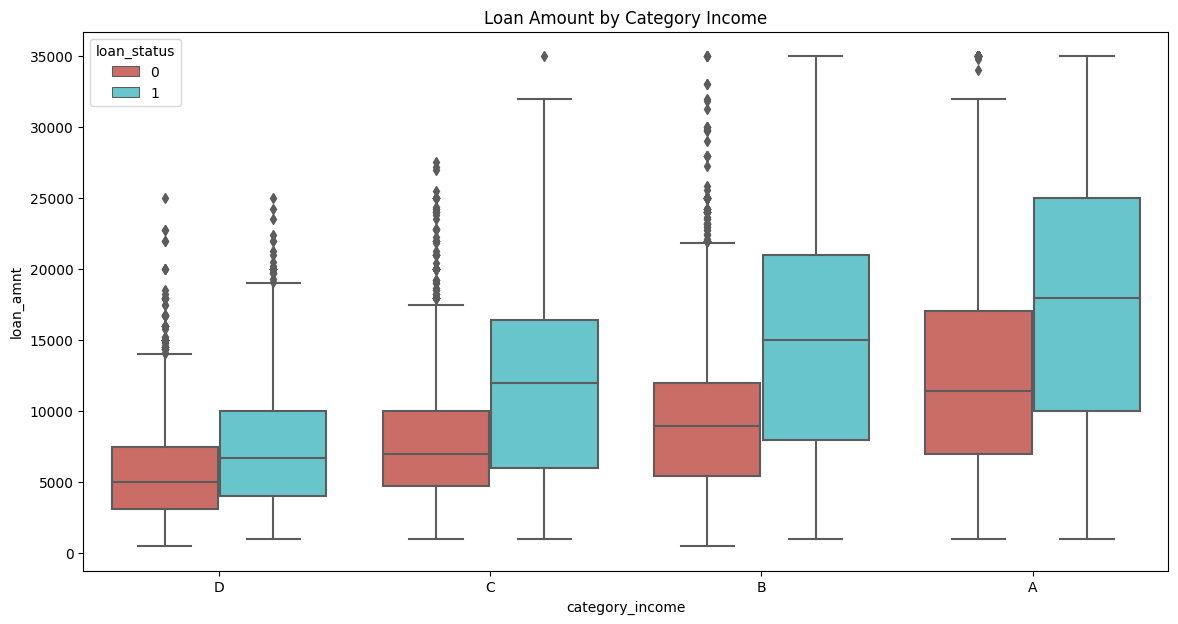

In [ ]:
fig = plt.figure(figsize=(14, 7))
g = sn.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Category Income")
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

In [ ]:
for categorical_variable in catvars:
  print("Feature: {} ... Categories: {}".format(categorical_variable, df_train[categorical_variable].unique()))

Feature: person_home_ownership ... Categories: ['MORTGAGE' 'RENT' 'OWN' 'OTHER']
Feature: loan_intent ... Categories: ['MEDICAL' 'HOMEIMPROVEMENT' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'PERSONAL']
Feature: loan_grade ... Categories: ['C' 'A' 'B' 'D' 'E' 'G' 'F']
Feature: cb_person_default_on_file ... Categories: ['Y' 'N']
Feature: category_income ... Categories: ['D', 'C', 'A', 'B']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


The number of categories:

In [ ]:
df_train = pd.get_dummies(df_train,
                          columns=catvars,
                          dummy_na=False,
                          drop_first=True)

In [ ]:
df_test = pd.get_dummies(df_test,
                         columns=catvars,
                         dummy_na=False,
                         drop_first=True)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables 
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7. 

* One column for the target `loan_status`. 

* Total number of columns: 26
---

### 3.2 Preprocessing Numerical Variables

In [ ]:
df_train_targets = df_train['loan_status']
df_train_features = df_train.drop('loan_status',axis=1)

df_test_targets = df_test['loan_status']
df_test_features = df_test.drop('loan_status',axis=1)

In [ ]:
df_train_features_numvars = df_train_features[numvars]
df_train_features_rest = df_train_features[df_train_features.columns[~df_train_features.columns.isin(numvars)]]


df_test_features_numvars = df_test_features[numvars]
df_test_features_rest = df_test_features[df_test_features.columns[~df_test_features.columns.isin(numvars)]]

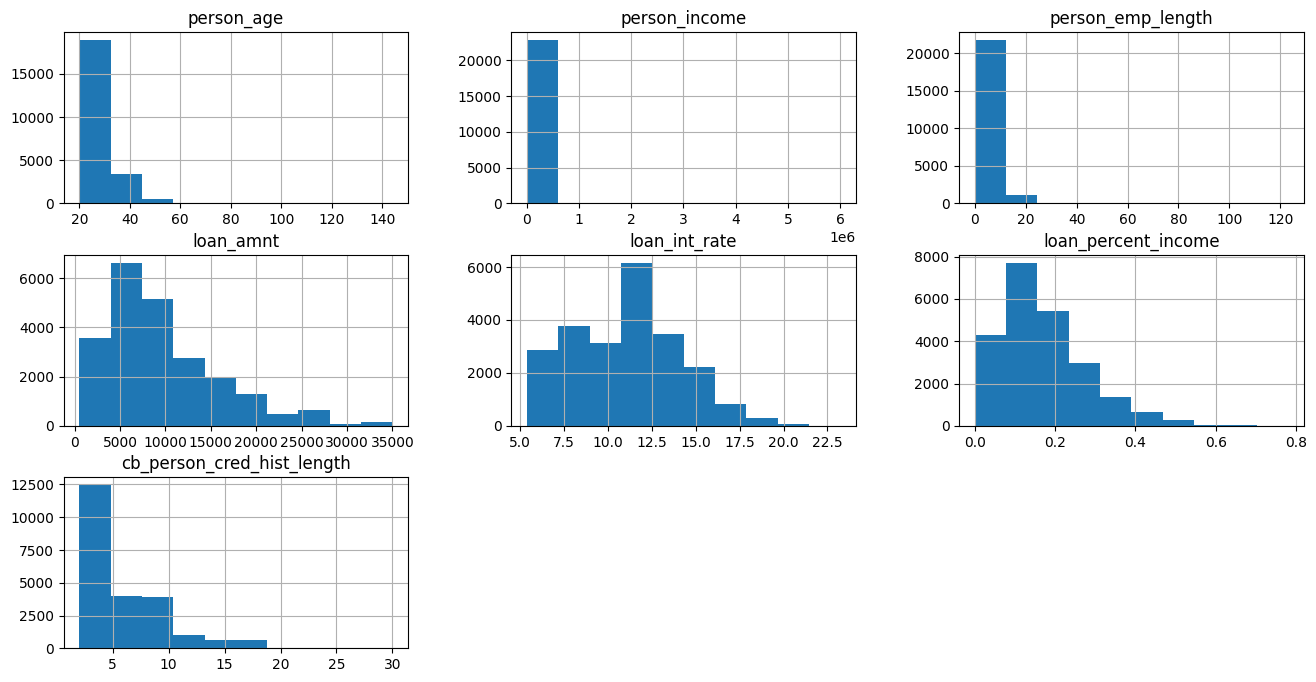

In [ ]:
df_train_features_numvars.hist(figsize=(16, 8))
plt.show()

There are two ways of scaling a numerical variable:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---

Plot the histograms of the numerical features after the scaling process.

---

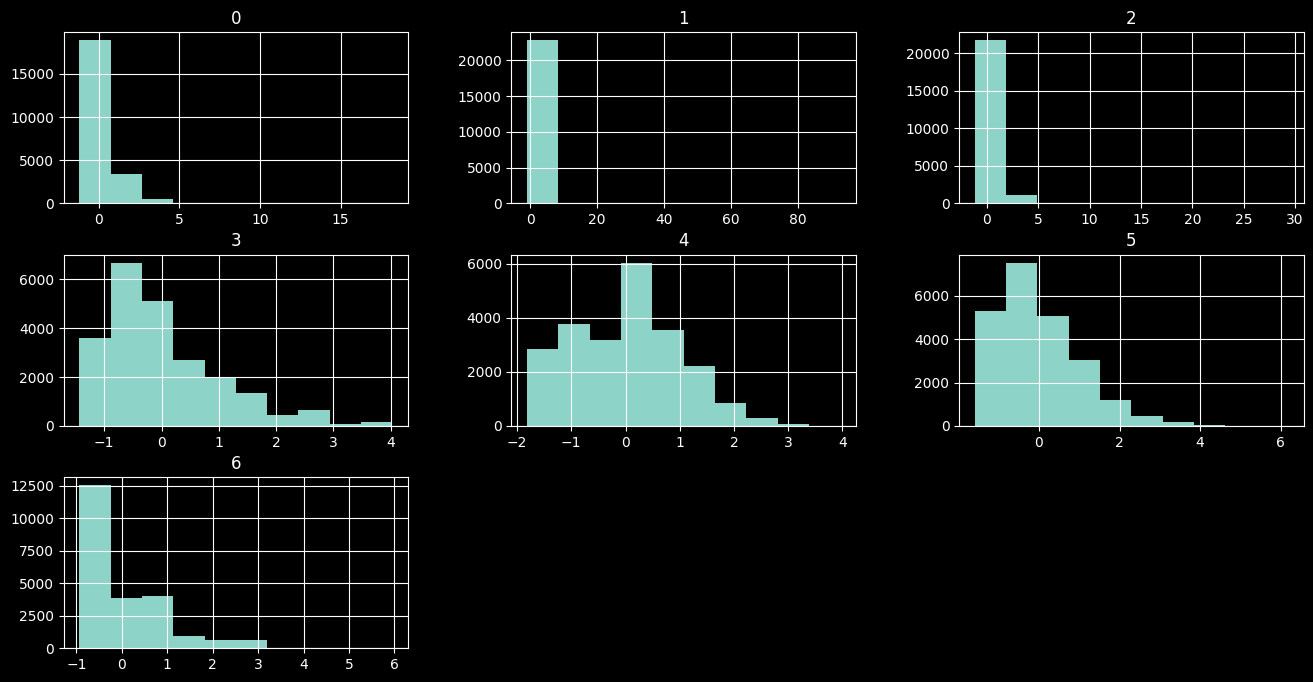

In [ ]:
df_train_features_numvars.hist(figsize=(16, 8))
plt.show()

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

The F1 score is calculated as follows: 

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

In [ ]:
# Import module 
from sklearn.model_selection import cross_val_score
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X, y):
    precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

In [ ]:
# Import module
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix on the test set")
  plt.show()



### 4.2 Fine Tuning Random Forest

We would like to tune the following hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


In [ ]:
# Import Modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf, 
                               param_distributions = random_grid, # grid of all possible combinations of hp (defined in a dictionary)
                               n_iter = 10, # Number of hp that you want to test 
                               cv = 3, # Number of folds in cross validation
                               verbose=2, 
                               scoring="f1",# Evaluation metric 
                               random_state=42, # fixing the seed
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=60, n_estimators=250, random_state=42)

In [ ]:
rf_best = rf_random.best_estimator_ # Random forest corresponding to the best combination of HP

---
<font color=green>Q39:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`. 
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7652
           1       0.95      0.73      0.82      2122

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



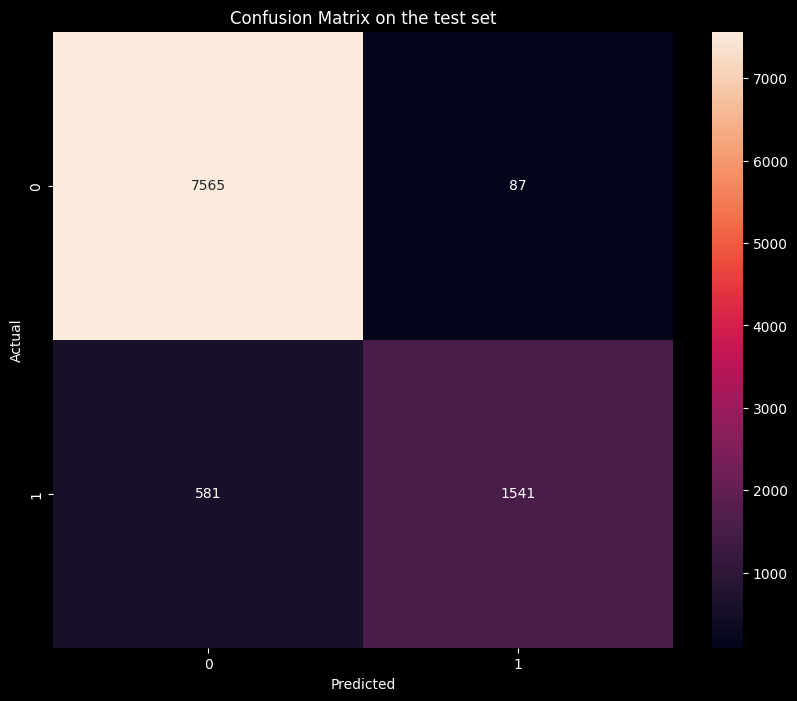

In [ ]:
# Evaluation performances
# rf_best.predict() is gonna output binary values 0/1 based on a threshold of 0.5 vs rf_best.predict_proba() outputs probailities 
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))
# Confusion Matrix
plot_confusion_matrix(y_test, y_hat)


# 5. Adjusting the threshold

### 5.2 Adjusting the probability threshold

**Our objective in this section is to adjust the threshold in order to match a desired recall**

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

In [ ]:
!pip install plot_metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


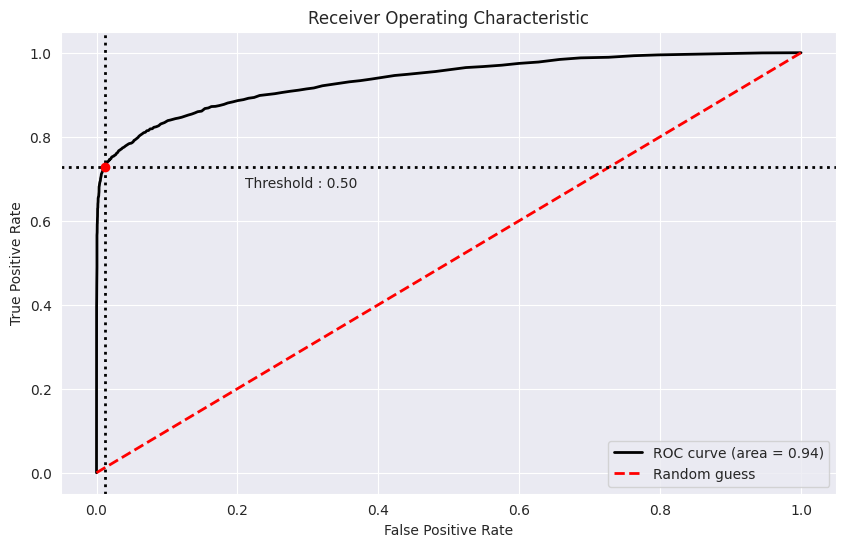

In [ ]:
# Import module
from plot_metric.functions import BinaryClassification

# Plot the ROC curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7652
           1       0.95      0.73      0.82      2122

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



In [ ]:
# Let us find the threshold with the highest recall
from sklearn.metrics import recall_score
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

# The objective recall
OBJECTIVE_RECALL = 0.8

# Initialize the best threshold to 0.5
best_threshold = 0.5
# Calculate the binary prediction y_hat associated with the threshold 0.5
y_hat = (y_hat_proba > best_threshold)
# Calculate the recall associated with the threshold 0.5
best_recall = recall_score(y_test, y_hat)

# Find the best threshold 
for th in np.arange(0.01, 1, 0.01)[::-1]:
  # Calculate the binary prediction y_hat associated with the threshold th
  y_pred = (y_hat_proba > th)
  recall = recall_score(y_test, y_pred)
  if recall > OBJECTIVE_RECALL:
    best_recall = recall
    best_threshold = th
    break
print("The best Threshold is {}...The best recall is {}".format(best_threshold, best_recall))

The best Threshold is 0.28...The best recall is 0.8034872761545712


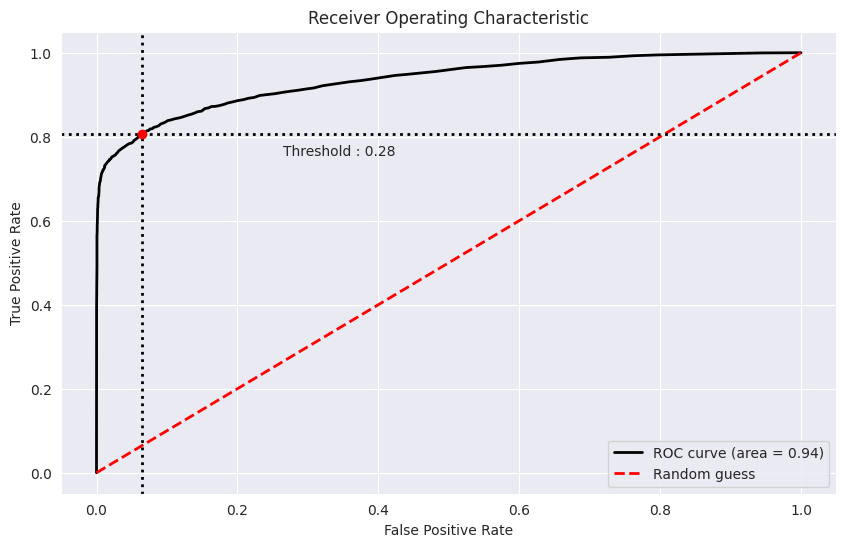

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], threshold=best_threshold, labels = [0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th
y_hat = (y_hat_proba >= best_threshold)

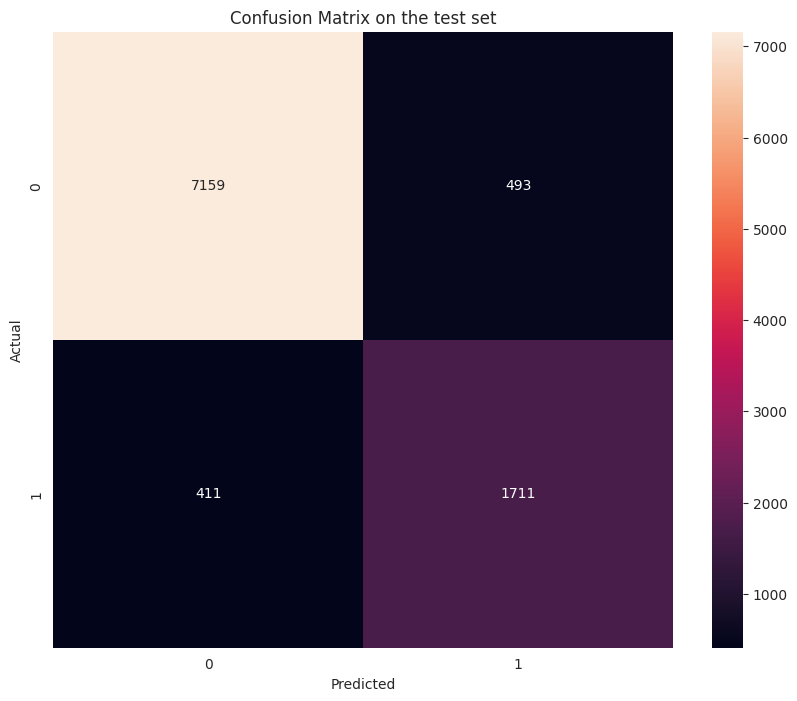

In [ ]:
# plot the confusion matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

In [ ]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7652
           1       0.78      0.81      0.79      2122

    accuracy                           0.91      9774
   macro avg       0.86      0.87      0.87      9774
weighted avg       0.91      0.91      0.91      9774

